In [1]:
import numpy as np
import pandas as pd
from numpy.random import multivariate_normal as mvn

import matplotlib.pyplot as plt

# Load data from https://www.openml.org/d/554
from sklearn.datasets import fetch_openml

from sklearn.mixture import BayesianGaussianMixture

/Users/erikallen/.virtualenvs/generative-models/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):

        # List of all digit options
        self.K = list(set(Y))

        self.gaussians = {}
        self.p_y = {}
        
        for k in self.K:
            print(k)
            Xk   = X[Y == k]         # We get all the Xi of class k
            gmm = BayesianGaussianMixture(10, max_iter=10000)
            gmm.fit(Xk)
            self.gaussians[k] = gmm
            self.p_y[k] = len(Xk)
        
        pyk_total = sum(self.p_y.values())
        self.p_y = {k: v / pyk_total for k, v in self.p_y.items()}
        
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        return clamp_sample( sample[0].reshape(28, 28) )

    def sample(self):

        probs = list(self.p_y.values())
        keys = list(self.p_y.keys())
        
        y = np.random.choice(keys, None, p=probs)
        return clamp_sample( self.sample_given_y(y) )

In [3]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
Y = np.array([int(o) for o in Y])
X /= 255.0

#X[X >= .5] = 1.
#X[X < .5] = 0.

In [4]:
clf = BayesClassifier()
clf.fit(X, Y)

0
1
2
3
4
5
6
7
8
9


In [5]:
# sample 44 new points from the data
new_data = []
for i in range(44):
    new_data.append(clf.sample())
new_data = np.asarray(new_data).reshape((4, 11, -1))
# Get real examples of a "2"
real_data = X[:44].reshape((4, 11, -1))

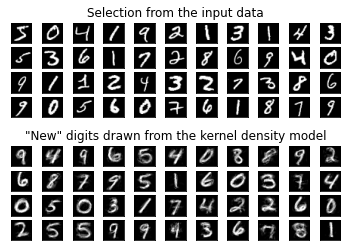

In [6]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((28, 28)),
                             cmap='gray')
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((28, 28)),
                             cmap='gray')

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()
